# Datenimport

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile
import scipy.signal
import math
import os,glob
from scipy.signal import decimate
from scipy.signal import spectrogram
from ipynb.fs.full.sonicshark_funktionen import sonic_roh_import, sonic_feature_import
%matplotlib widget

# Import der SonicShark Roh-Daten (.contindump)
dateiname = '20211216142759001_Channel1.contindump'
unterordner = 'TP_02_Messdaten/SonicShark'
abtastrate = 1e6
roh_daten_1, roh_zeit_1 = sonic_roh_import(dateiname, abtastrate, unterordner)

dateiname = '20211216142759001_Channel2.contindump'
unterordner = 'TP_02_Messdaten/SonicShark'
abtastrate = 1e6
roh_daten_2, roh_zeit_2 = sonic_roh_import(dateiname, abtastrate, unterordner)

# Import der SonicShark Features (.db)
dateiname = 'Beispiel_SonicShark_1.db'
unterordner = 'TP_02_Messdaten/SonicShark'
feature_daten, feature_name = sonic_feature_import(dateiname, unterordner)

del dateiname, unterordner

# Spektogram aus Rohdaten berechnen (großes Zeitfenster = lange berechnung)
von = 0  # in s
bis = 10 # in s
spectrogram_frequency_1, spectrogram_time_1, spectrogram_amplitude_1 = spectrogram(roh_daten_1[int(von*abtastrate):int(bis*abtastrate)], 
                                                                             fs=abtastrate, nperseg = 10000)

del von, bis

# Diagramme erstellen
## Allgemeine formatierung

In [9]:
#Für alle möglichen Optionen
#plt.rcParams.keys() 

# Diagrammgröße
plt.rcParams["figure.figsize"] = (10/2.54,6/2.54) # /2.54 inch to cm 

# Linien und Marker
plt.rcParams['lines.linestyle'] = '-'
plt.rcParams["lines.linewidth"] = 1
plt.rcParams["lines.markersize"] = .5
plt.rcParams["lines.marker"] = 'o'
plt.rcParams["lines.marker"] = 'o'

# Tics
plt.rcParams["axes.grid"] = True
plt.rcParams["xtick.minor.visible"] = True

# Schriftgröße
plt.rcParams['font.size'] = 6
plt.rcParams['axes.titlesize'] = 6
plt.rcParams['axes.labelsize'] = 6
plt.rcParams['xtick.labelsize'] = 6
plt.rcParams['ytick.labelsize'] = 6
plt.rcParams['legend.fontsize']  = 6

# Legende
plt.rcParams["legend.loc"] =  'upper right' # lower upper left right center best

# Ausgabeart
#%matplotlib inline  
plt.rcParams['figure.dpi'] = 125 # Regelt auch die Größe des Diagramms in der Notebook Darstellung
plt.rcParams["figure.facecolor"] = "white"

## Rohdaten

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
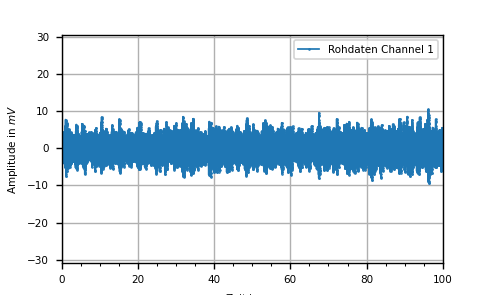

In [20]:
fig, ax = plt.subplots()

y = roh_daten_1/1000
x = ((np.linspace(0, len(y), len(y))/1e6) - 35) * 1000 - 10000
label = 'Rohdaten Channel 1'

pos = ax.plot(x, y, label = label)

# Mittelwert
#von = 83.1
#bis = 85.8
#feature_frequenz = len(x)/x[-1]
#mittelwert_array = y[int(von*feature_frequenz):int(bis*feature_frequenz)]
#mittelwert = np.mean(mittelwert_array)
#y = np.full(2, mittelwert)
#x = [von, bis]
   
#pos = ax.plot(x, y, label = 'Mittelwert')

# Achsenlimits
#ax.set_ylim()
ax.set_xlim(0, 0.1*1000)

# Beschriftung
#ax.set_title('FeatureTable SonicShark - ' + feature_name[feature])
ax.set_xlabel('Zeit in $ms$')
ax.set_ylabel('Amplitude in $mV$')

# Legende aufhübschen asassss
legend = ax.legend(loc= 'upper right')

plt.show()

# Diagramm als .png speichern
fig.savefig('SonicShark_' + 'Rohdaten_Channel_1_#5' ,bbox_inches='tight')

In [4]:
x = np.linspace(0, len(y), len(y))/1e7-3
x[-1]

4.525

## Alle Features

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
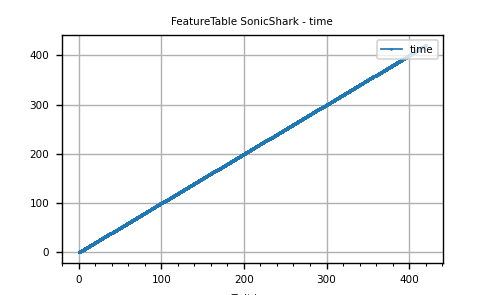

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
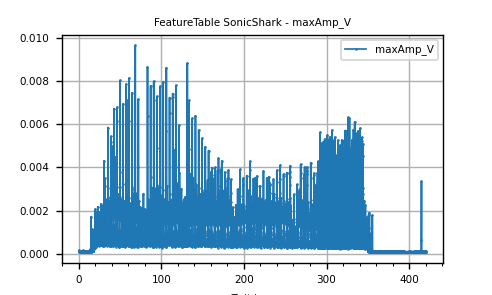

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
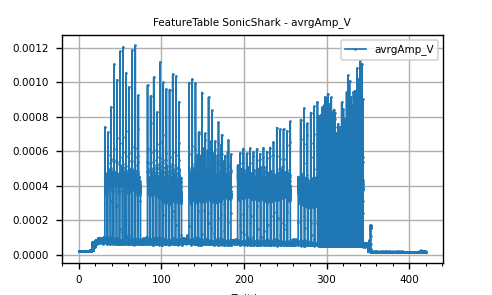

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
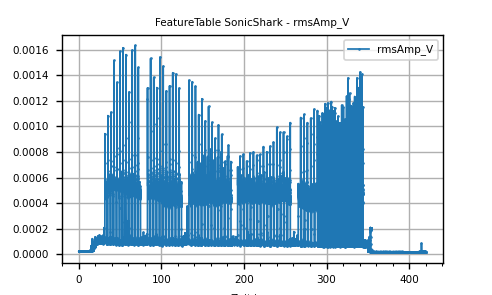

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
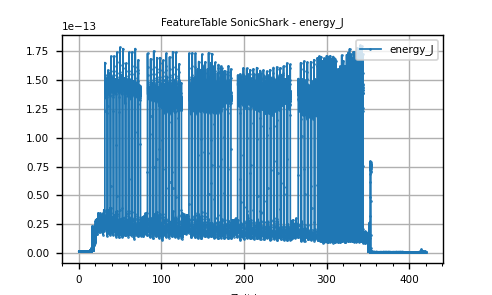

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
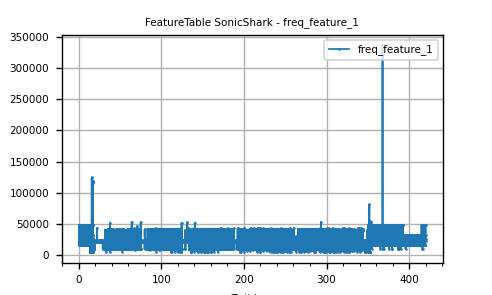

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
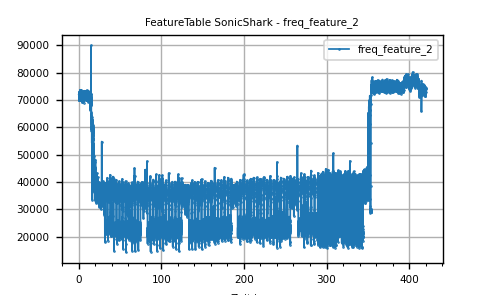

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
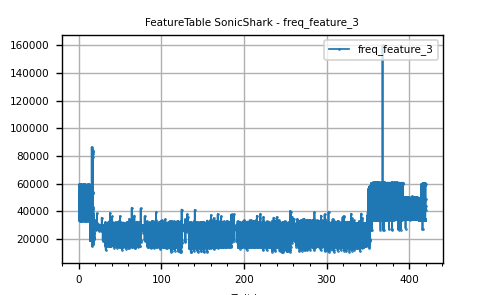

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
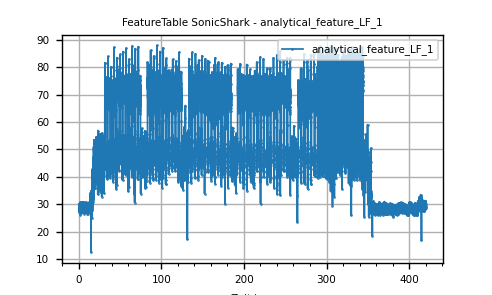

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
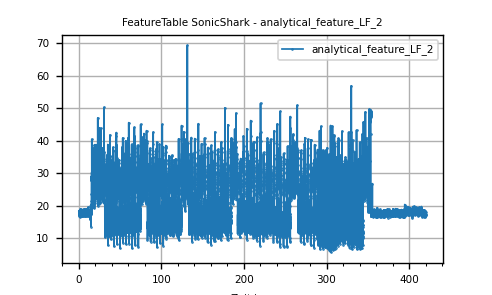

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
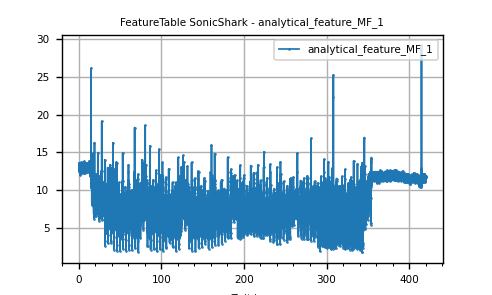

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
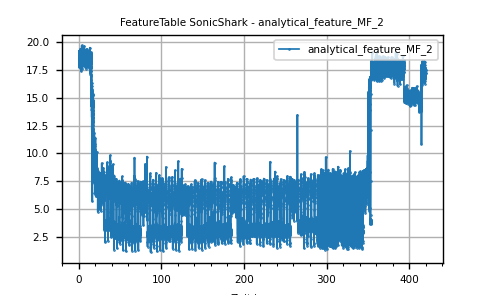

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
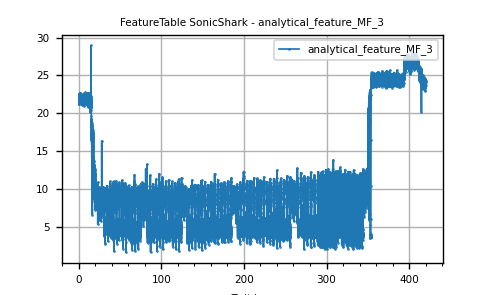

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
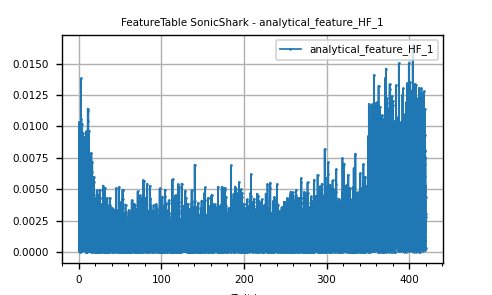

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
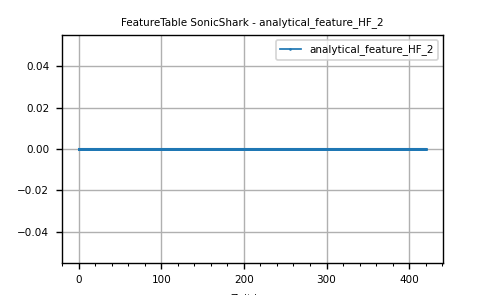

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
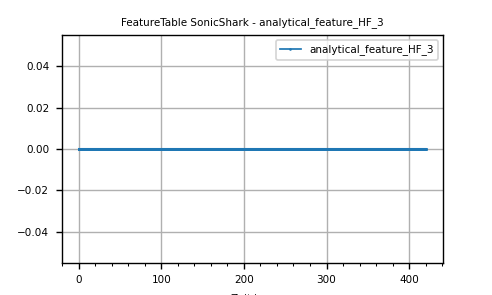

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
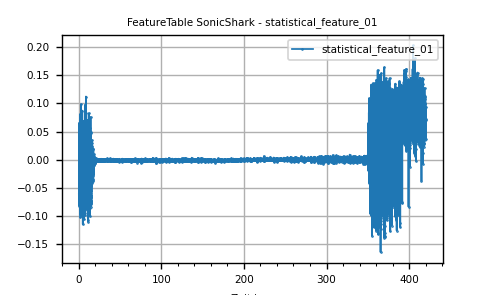

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
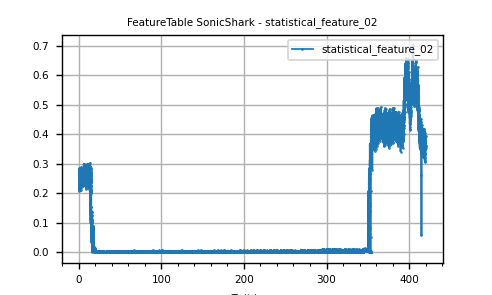

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
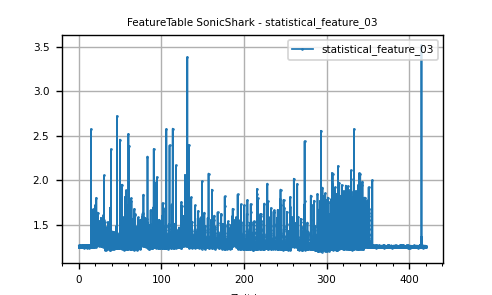

<ipython-input-5-b8ea0a5d3f0b>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
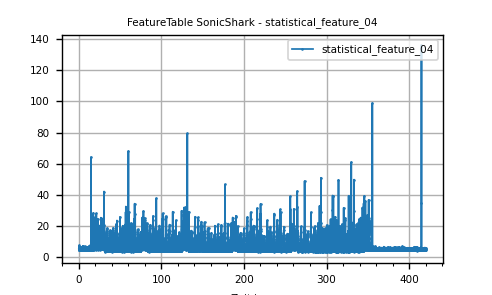

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
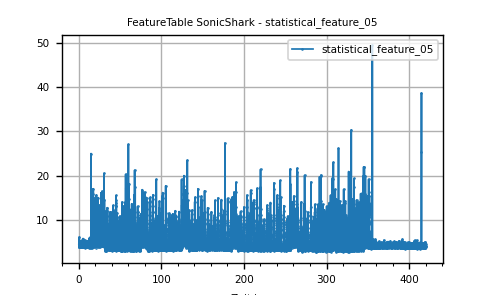

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
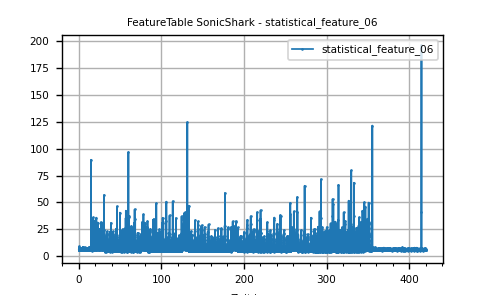

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
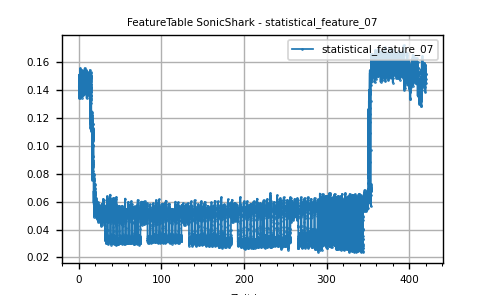

In [5]:
[a, b] = feature_daten.shape 

for feature in range(0,a):
    fig, ax = plt.subplots()
    x = feature_daten[0,:]
    x = np.linspace(x[0], x[-1], len(x))
    y = feature_daten[feature,:]
    label = feature_name[feature]

    pos = ax.plot(x, y, label = label)
    
    # Mittelwert
#     von = 83.1
#     bis = 85.8
#     feature_frequenz = len(x)/x[-1]
#     mittelwert_array = y[int(von*feature_frequenz):int(bis*feature_frequenz)]
#     mittelwert = np.mean(mittelwert_array)
#     y = np.full(2, mittelwert)
#     x = [von, bis]
#    
#    pos = ax.plot(x, y, label = 'Mittelwert')

    # Achsenlimits
    #ax.set_ylim()
#    ax.set_xlim(von-1, bis+1)

    # Beschriftung
    ax.set_title('FeatureTable SonicShark - ' + feature_name[feature])
    ax.set_xlabel('Zeit in $s$')
    #ax.set_ylabel('Wert in $...$')

    # Legende aufhübschen
    legend = ax.legend(loc= 'upper right')

    plt.show()

    # Diagramm als .png speichern
    fig.savefig('SonicShark_' + feature_name[feature], bbox_inches='tight')

## Spectrogram

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
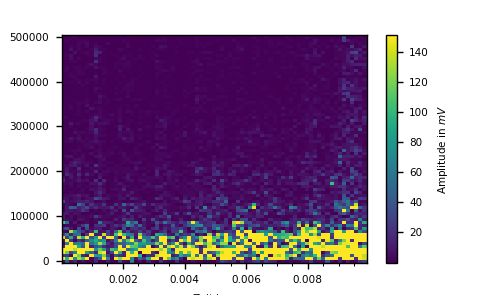

In [6]:
von = 4.5  # in s
bis = 4.51 # in s
spectrogram_frequency_1, spectrogram_time_1, spectrogram_amplitude_1 = spectrogram(roh_daten_1[int(von*abtastrate):int(bis*abtastrate)], 
                                                                             fs=abtastrate, nperseg = 150, scaling='spectrum')


# Plot Objekte erzeugen
fig, ax = plt.subplots()

# Ausreißer entfernen
spectrogram_amplitude_1 = np.clip(spectrogram_amplitude_1, 0,  np.percentile(spectrogram_amplitude_1.reshape(-1,1), 95, axis = 0)[-1])

# Eigentlichen Plot definieren
pos = plt.pcolormesh(spectrogram_time_1, spectrogram_frequency_1, spectrogram_amplitude_1, shading='auto')

# Achslimits
#ax.set_xlim(0,4)
#plt.clim(0,0.15)

# Achsbeschriftung
plt.ylabel('Frequenz in $Hz$')
plt.xlabel('Zeit in $s$')
fig.colorbar(pos, label='Amplitude in $mV$')

# Plot Anzeigen
plt.show()

# Abspeichern
fig.savefig('Spektogramm', bbox_inches='tight')

## Eigenes Feature

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
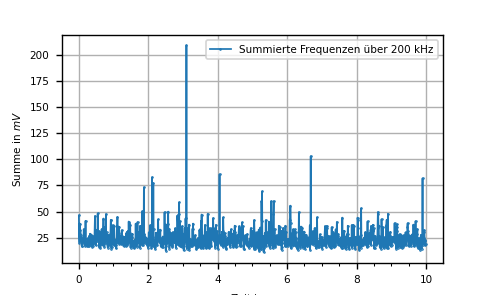

In [7]:
# Spektogram aus Rohdaten berechnen (großes Zeitfenster = lange berechnung)
von = 0  # in s
bis = 10 # in s
spectrogram_frequency_1, spectrogram_time_1, spectrogram_amplitude_1 = spectrogram(roh_daten_1[int(von*abtastrate):int(bis*abtastrate)], 
                                                                             fs=abtastrate, nperseg = 10000)
del von, bis

# Eigenes Feature: Summierte frequenzen über 200 kHz
clipped_amplitude = spectrogram_amplitude_1[0:-1,:]
eigenes_feature_1 = np.sum(clipped_amplitude, 0)

fig, ax = plt.subplots()
x = spectrogram_time_1
y = eigenes_feature_1
label = 'Summierte Frequenzen über 200 kHz'

pos = ax.plot(x, y, label = label)

# Achsenlimits
#ax.set_ylim()
#ax.set_xlim(101, 149)

# Beschriftung
ax.set_xlabel('Zeit in $s$')
ax.set_ylabel('Summe in $mV$')

# Legende aufhübschen
legend = ax.legend(loc= 'upper right')

plt.show()

# Diagramm als .png speichern
fig.savefig('SonicShark_eigenes_feature_1', bbox_inches='tight')